# Case Study: Employee Attrition Method - 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\KoyelGuha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_employee_detail = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [3]:
df_employee_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df_employee_detail.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Encoding the categorical features and the target value. 1- Yes. 0-No.

In [5]:
X_features = ['Age','DailyRate','DistanceFromHome','HourlyRate', 'MonthlyIncome',
                'MonthlyRate','PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
                'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
                'BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
                'JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
                'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance'
              ]

categorical_features = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
                'JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
                'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [6]:
employee_encoded_df = pd.get_dummies(data=df_employee_detail[X_features],
                                     columns=categorical_features,
                                     drop_first=True)

In [7]:
Y = df_employee_detail.Attrition.map(lambda x: int(x=='Yes'))
X = employee_encoded_df

## Splitting the dataset into train and test set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)

## Building decision tree classifier using Gini criteria

In [10]:
dtree_initial = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [11]:
dtree_initial.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Measuring test accuracy

In [12]:
dtree_pred = dtree_initial.predict(x_test)
metrics.roc_auc_score(y_test,dtree_pred)

0.5439171699741157

## Building decision tree classifier using Entropy criteria 

In [13]:
dtree_initial = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree_initial.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Measuring test accuracy

In [14]:
dtree_pred = dtree_initial.predict(x_test)
metrics.roc_auc_score(y_test,dtree_pred)

0.5344046591889561

## Hyperparameter tuning using GridSearchCV to find the best parameters in model building:

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
tuned_parameters = [{'criterion':['gini','entropy'],
                    'max_depth':range(2,10)}]

In [17]:
dtree_final = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=tuned_parameters,
                           scoring='roc_auc',
                           cv=10)

In [18]:
dtree_final.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [19]:
dtree_final.best_score_

0.7314532974503939

In [20]:
dtree_final.best_params_

{'criterion': 'entropy', 'max_depth': 3}

## Measuring test accuracy

In [21]:
dtree_pred=dtree_final.predict(x_test)
metrics.roc_auc_score(y_test,dtree_pred)

0.5344046591889561

## Measuring train accuracy using k-fold cross validation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cv_scores = cross_val_score(estimator=dtree_final,X=x_train,y=y_train,cv=10,scoring='roc_auc')

In [24]:
print(np.mean(cv_scores))

0.7084751616104719


In [25]:
print(metrics.classification_report(y_test,dtree_pred))

             precision    recall  f1-score   support

          0       0.87      0.99      0.92       380
          1       0.50      0.08      0.14        61

avg / total       0.82      0.86      0.82       441



## Visualizing Decision tree

In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [27]:
dtree_final

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

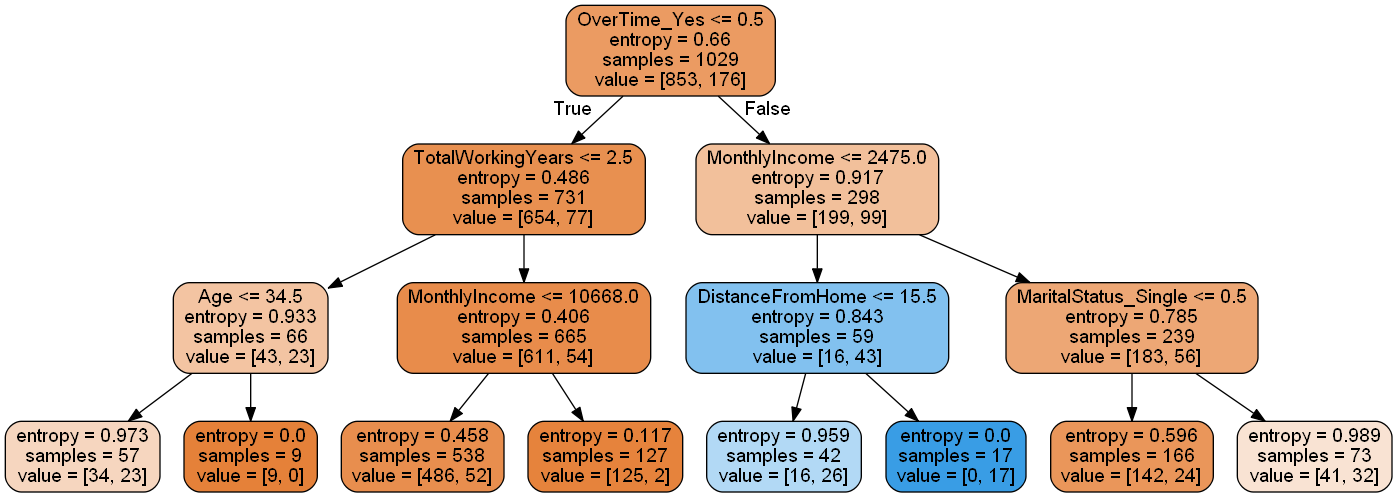

In [28]:
dot_data = StringIO()  
export_graphviz(dtree_final.best_estimator_, out_file=dot_data,feature_names=employee_encoded_df.columns,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  